In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.draw import rectangle
from skimage.transform import radon, iradon
from skimage.data import shepp_logan_phantom

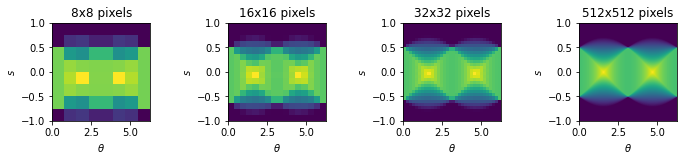

In [2]:
def unit_square_sinogram(nx):
    """
    Construct a sinogram from a unit square.
    
    Input:
        nx: amount of pixels
    Output:
        f: sinogram
        
    """
    theta = np.linspace(0., 180., nx)
    
    # Create the unit square
    ii, jj = rectangle(start=(nx//4, nx//4), end=(3*nx//4, 3*nx//4))
    u = np.zeros((nx, nx))
    u[ii, jj] = 1
    
    # Create sinogram
    f = radon(u, theta)

    return f

fig, ax = plt.subplots(1, 4)
nxs = [8, 16, 32, 512]
for i in range(len(nxs)):
    f = unit_square_sinogram(nxs[i])
    ax[i].imshow(f, extent=(0, 2*np.pi, -1, 1), vmin=0)
    ax[i].set_xlabel(r"$\theta$")
    ax[i].set_ylabel(r"$s$")
    ax[i].set_aspect(np.pi)
    ax[i].set_title(f"{nxs[i]}x{nxs[i]} pixels")
    
fig.tight_layout()
fig.set_figwidth(10)

plt.savefig("./figures/h1/unit_square_sinogram.png", 
            dpi=300, transparent = True, bbox_inches = "tight", pad_inches = 0)

sigma	error
0.01	0.126
0.1	0.126
1	0.168
10	1.115


na	error
10	1.64
20	0.914
50	0.373
100	0.202


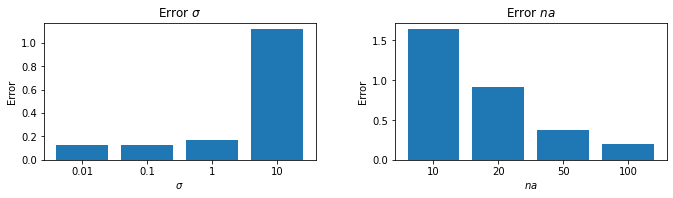

In [26]:
nx = 400
na = 400

def reconstruct_shepp_logan(theta, sigma):  
    # Create Shepp Logan Phantom
    u = shepp_logan_phantom()
    
    # Create sinogram and add noise
    f = radon(u, theta=theta)
    f_noisy = f + sigma * np.random.randn(nx, na)
    
    # Reconstruct using filtered back projection
    u_fbp = iradon(f_noisy, theta=theta)
    
    return u_fbp

def reconstruction_error(im_1, im_2):
    return np.linalg.norm(im_1 - im_2) / np.linalg.norm(im_1)


# Create Shepp Logan Phantom so we can compare
u = shepp_logan_phantom()

errors_sigma = dict()
theta = np.linspace(0., 180., na)
for sigma in [.01, .1, 1, 10]:
    u_fbp = reconstruct_shepp_logan(theta, sigma)
    errors_sigma[str(sigma)] = reconstruction_error(u, u_fbp)

errors_na = dict()
sigma = 0
for na in [10, 20, 50, 100]:
    theta = np.linspace(0., 180., na)
    u_fbp = reconstruct_shepp_logan(theta, sigma)
    errors_na[str(na)] = reconstruction_error(u, u_fbp)


# Plot the errors
fig, ax = plt.subplots(1, 2)

ax[0].bar(*zip(*errors_sigma.items()))
ax[0].set_xlabel(r"$\sigma$")
ax[0].set_ylabel("Error")
ax[0].set_title(r"Error $\sigma$")

ax[1].bar(*zip(*errors_na.items()))
ax[1].set_xlabel(r"$na$")
ax[1].set_ylabel("Error")
ax[1].set_title(r"Error $na$")

fig.tight_layout()
fig.set_figwidth(10)
fig.set_figheight(2.5)

plt.savefig("./figures/h1/errors_sigma_and_na.png", 
            dpi=300, transparent = True, bbox_inches = "tight", pad_inches = 0)

# Print values for table
print("sigma\terror")
for key, value in errors_sigma.items():
    print(f"{key}\t{round(value, 4)}")
print("\n")
print("na\terror")
for key, value in errors_na.items():
    print(f"{key}\t{round(value, 4)}")